# ELEN 6885 Reinforcement Learning coding assignment

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import gym

## 1. Incremental Implementation of Average
We've finished the incremental implementation of average for you. Please call the function with 1/step step size and fixed step size to compare the difference between this two on a simulated Bandit problem.<br />
<span style="color:red">( pts)</span>

In [2]:
from RLalgs.utils import estimate
random.seed(6885)
numTimeStep = 10000
q_h = np.zeros(numTimeStep + 1) # Q Value estimate with 1/step step size
q_f = np.zeros(numTimeStep + 1) # Q value estimate with fixed step size
FixedStepSize = 0.5 #A large number to exaggerate the difference
for step in range(1, numTimeStep + 1):
    if step < numTimeStep / 2:
        r = random.gauss(mu = 1, sigma = 0.1)
    else:
        r = random.gauss(mu = 3, sigma = 0.1)
    
    #TIPS: Call function estimate defined in ./RLalgs/utils.py
    ############################
    # YOUR CODE STARTS HERE
    q_h[step] = estimate(OldEstimate = q_h[step - 1], StepSize = 1 / step, Target = r)
    q_f[step] = estimate(OldEstimate = q_f[step - 1], StepSize = FixedStepSize, Target = r)
    # YOUR CODE ENDS HERE
    ############################
    
q_h = q_h[1:]
q_f = q_f[1:]

RLalgs is a package containing Reinforcement Learning algorithms Epsilon-Greedy, Policy Iteration, Value Iteration, Q-Learning, and SARSA.


Plot the two Q value estimate (Please include a title, labels on both axes, and legends<br />
<span style="color:red">( pts)</span>

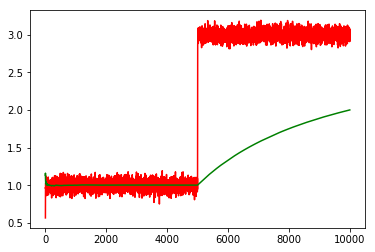

In [3]:
############################
# YOUR CODE STARTS HERE
x = np.arange(numTimeStep)
plt.plot(x, q_f, 'r')
plt.plot(x, q_h, 'g')
plt.show()
plt.close()
# YOUR CODE ENDS HERE
############################

## 2. $\epsilon$-Greedy for Exploration
In Reinforcement Learning, we are always faced with the dilemma of exploration and exploitation. $\epsilon$-Greedy is a trade-off between these two. You are gonna implement Greedy and $\epsilon$-Greedy in the simulated MAB problem. We combine these two policies by treating Greedy as $\epsilon$-Greedy where $\epsilon = 0$. Edit the function epsilon_greedy in ./RLalgs/utils.py<br />
<span style="color:red">( pts)</span>

In [4]:
from RLalgs.utils import epsilon_greedy
np.random.seed(6885) #Set the seed to cancel the randomness
q = np.random.normal(0, 1, size = 5)
############################
# YOUR CODE STARTS HERE
greedy_action = epsilon_greedy(q, e = 0) #Use epsilon = 0 for Greedy
e_greedy_action = epsilon_greedy(q, e = 0.1, seed = 6885) #Pass the parameter seed = 6885 to the function
# YOUR CODE ENDS HERE
############################
print('Values:')
print(q)
print('Greedy Choice =', greedy_action)
print('Epsilon-Greedy Choice =', e_greedy_action)

Values:
[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968]
Greedy Choice = 0
Epsilon-Greedy Choice = 4


You should get the following results.<br />
Values:<br />
\[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968\]<br />
Greedy Choice = 0<br />

## 3. Frozen Lake Environment 

In [5]:
env = gym.make('FrozenLake-v0')

### 3.1 Derive Q value from V value
Edit function <br />
TIPS: $q(s, a)=\sum_{s',r}p(s',r|s,a)(r+\gamma v(s'))$<br />
<span style="color:red">( pts)</span>

In [6]:
from RLalgs.utils import action_evaluation
v = np.ones(16)
q = action_evaluation(env = env.env, gamma = 1, v = v)
print('Action values:')
print(q)

Action values:
[[1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.33333333 1.33333333 1.33333333]
 [1.         1.         1.         1.        ]]


Pseudo-codes of four algorithms can be found on Page 80, 83, 130, 131 of the Sutton's book

### 3.2 Model-based RL algorithms

In [7]:
from RLalgs.utils import action_evaluation, action_selection, render

### 3.2.1 Policy Iteration
Edit the function policy_iteration and relevant functions in ./RLalgs/pi.py to implement the Policy Iteration Algorithm<br />
<span style="color:red">( pts)</span>

In [8]:
from RLalgs.pi import policy_iteration
V, policy, numIterations = policy_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations =', numIterations)

State values:
[0.0211243  0.02312034 0.03617759 0.0120592  0.0402527  0.
 0.08541245 0.         0.09259246 0.16808039 0.22005981 0.
 0.         0.19158899 0.4066866  0.        ]
Number of iterations = 500


In [9]:
#Uncomment and run the following to render your result, comment them when you generate the pdf
#Q = action_evaluation(env = env.env, gamma = 1, v = V)
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.2.2 Value Iteration
Edit the function value_iteration and relevant functions in ./RLalgs/vi.py to implement the Value Iteration Algorithm<br />
<span style="color:red">( pts)</span>

In [10]:
from RLalgs.vi import value_iteration
V, policy, numIterations = value_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352773 0.82352718 0.8235268  0.8235266  0.8235279  0.
 0.52941062 0.         0.82352816 0.8235285  0.76470509 0.
 0.         0.88235231 0.94117615 0.        ]
Number of iterations to converge = 389


In [11]:
#Uncomment and run the following to render your result, comment them when you generate the pdf
#Q = action_evaluation(env = env.env, gamma = 1, v = V)
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.3 Model free RL algorithms

### 3.3.1 Q-Learning
Edit the function QLearning in ./RLalgs/ql.py to implement the Q-Learning Algorithm<br />
<span style="color:red">( pts)</span>

In [12]:
from RLalgs.ql import QLearning
Q = QLearning(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[0.32987028 0.13687094 0.13741048 0.14148689]
 [0.00344952 0.15077958 0.0053702  0.00802854]
 [0.03603217 0.11269408 0.03447468 0.01233862]
 [0.03155754 0.01405353 0.00957886 0.00798415]
 [0.34193265 0.14500159 0.10098825 0.15574019]
 [0.         0.         0.         0.        ]
 [0.164854   0.0421771  0.09560125 0.01974648]
 [0.         0.         0.         0.        ]
 [0.13340445 0.13597765 0.13394048 0.35491132]
 [0.15904567 0.3642435  0.24100064 0.18344796]
 [0.38589184 0.06657698 0.1385073  0.12272147]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.08756752 0.07531916 0.24100971 0.35357009]
 [0.26540493 0.64507104 0.38767515 0.45982162]
 [0.         0.         0.         0.        ]]


In [13]:
#Uncomment the following to render your result, comment them when you generate the pdf
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.3.2 SARSA
Edit the function SARSA in ./RLalgs/sarsa.py to implement the SARSA Algorithm<br />
<span style="color:red">( pts)</span>

In [14]:
from RLalgs.sarsa import SARSA
Q = SARSA(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[0.0616844  0.03982875 0.03825128 0.04375306]
 [0.00948243 0.0048101  0.01028325 0.04691815]
 [0.06152033 0.02249037 0.02212931 0.01096697]
 [0.02645151 0.         0.         0.0064596 ]
 [0.07368945 0.05306815 0.02594226 0.01463367]
 [0.         0.         0.         0.        ]
 [0.0593385  0.04503992 0.09801899 0.00163214]
 [0.         0.         0.         0.        ]
 [0.02698898 0.04529617 0.02361779 0.10245423]
 [0.05569574 0.0920051  0.1462275  0.05919839]
 [0.24912693 0.16342144 0.09568073 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.04605264 0.06086986 0.35816944 0.11225691]
 [0.06329205 0.68897092 0.20244202 0.17882752]
 [0.         0.         0.         0.        ]]


In [15]:
#Uncomment the following to render your result, comment them when you generate the pdf
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.4 Human
You can play this game if you are interested. See if you can get the frisbee either with or without the model

In [16]:
from RLalgs.utils import human_play
#Uncomment and run the following to play the game
#human_play(env)

## 4. Exploration VS. Exploitation
Try to reproduce Figure 2.2 (the upper one is enough) of the textbook based on the experiment described in Chapter 2.3<br />
<span style="color:red">Extra credit ( pts)</span>

In [17]:
# Do the experiment and record average reward acquired in each time step
############################
# YOUR CODE STARTS HERE
from RLalgs.utils import epsilon_greedy
q_star = np.random.normal(0, 1, size = 10)
numStep = 1000 #Number of steps
Na = np.zeros([3, 10]) #Number of each action played
q = np.zeros([3, 10]) #Reward estimate
R = np.zeros([3, numStep + 1]) #Average Rewards acquired
for step in range(1, numStep + 1):
    a1 = epsilon_greedy(q[0], e = 0)
    a2 = epsilon_greedy(q[1], e = 0.01)
    a3 = epsilon_greedy(q[2], e = 0.1)
    r1 = np.random.normal(q_star[a1], 1)
    r2 = np.random.normal(q_star[a2], 1)
    r3 = np.random.normal(q_star[a3], 1)
    Na[np.arange(3), [a1, a2, a3]] += 1
    q[0, a1] = estimate(OldEstimate = q[0, a1], StepSize = 1 / Na[0, a1], Target = r1)
    q[1, a2] = estimate(OldEstimate = q[1, a2], StepSize = 1 / Na[1, a2], Target = r2)
    q[2, a3] = estimate(OldEstimate = q[2, a3], StepSize = 1 / Na[2, a3], Target = r3)
    R[0, step] += estimate(OldEstimate = R[0, step - 1], StepSize = 1 / step, Target = r1)
    R[1, step] += estimate(OldEstimate = R[1, step - 1], StepSize = 1 / step, Target = r2) 
    R[2, step] += estimate(OldEstimate = R[2, step - 1], StepSize = 1 / step, Target = r3)

R = R[:, 1:]
# YOUR CODE ENDS HERE
############################

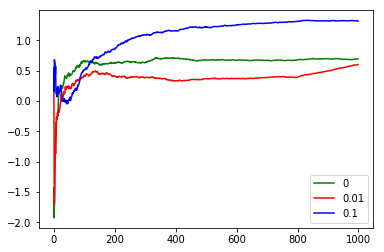

In [18]:
# Plot the average reward
############################
# YOUR CODE STARTS HERE
x = np.arange(numStep)
plt.plot(x, R[0], 'g', label = '0')
plt.plot(x, R[1], 'r', label = '0.01')
plt.plot(x, R[2], 'b', label = '0.1')
plt.legend()
plt.show()
plt.close()
# YOUR CODE ENDS HERE
############################

You should get a result that Greedy behaves well at the beginning, but then surpassed by $\epsilon$-Greedy with $\epsilon=0.1$